In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycaret as pcr
from utils.utils import get_project_root
from utils.df_z_score import z_score
from copy import copy

## Importing of data

In [88]:
df = pd.read_excel(get_project_root() / 'data/Belyy2017_GHG.xls')

In [89]:
df.head()

#  Year      fulldate (GMT)    fulldate (GMT+5) Local Date  \
0  1.0  2017 2017-07-13 19:00:00 2017-07-14 00:00:00 2017-07-14   
1  NaN  2017 2017-07-13 20:00:00 2017-07-14 01:00:00 2017-07-14   
2  NaN  2017 2017-07-13 21:00:00 2017-07-14 02:00:00 2017-07-14   
3  NaN  2017 2017-07-13 22:00:00 2017-07-14 03:00:00 2017-07-14   
4  NaN  2017 2017-07-13 23:00:00 2017-07-14 04:00:00 2017-07-14   

   Local time (GMT+5)  DayWeek  up_CO2_dry  up_CH4_dry     up_CO  ...  \
0                   0        5  401.014516    1.978242  0.073865  ...   
1                   1        5  401.098192    1.973113  0.074091  ...   
2                   2        5  400.871686    1.966405  0.072917  ...   
3                   3        5  400.772022    1.965230  0.073807  ...   
4                   4        5  400.726623    1.954376  0.071886  ...   

                                                  Ch    VV   Td  RRR  tR    E  \
0                                                NaN   NaN  NaN  NaN NaN  NaN   
1                                                NaN   NaN  NaN  NaN NaN  NaN   
2  Перистых, перисто-кучевых или перисто-слоистых...  20.0  5.2  NaN NaN  NaN   
3                                                NaN   NaN  NaN  NaN NaN  NaN   
4                                                NaN   NaN  NaN  NaN NaN  NaN   

   Tg  E.  sss  5.977980152803348  
0 NaN NaN  NaN           5.993998  
1 NaN NaN  NaN           5.994206  
2 NaN NaN  NaN           5.993641  
3 NaN NaN  NaN           5.993393  
4 NaN NaN  NaN           5.993279  

[5 rows x 52 columns]

In [90]:
df.shape

(3231, 52)

## Exploring of dataset

In [91]:
df.describe()

#         Year  Local time (GMT+5)      DayWeek   up_CO2_dry  \
count  1270.000000  3231.000000         3231.000000  3231.000000  3210.000000   
mean    634.500787  2016.120706           11.494893     4.043640   392.628731   
std     366.760368     0.769971            6.931234     2.015332     5.742818   
min       1.000000  2015.000000            0.000000     1.000000   372.560000   
25%     317.250000  2016.000000            5.000000     2.000000   390.735845   
50%     634.500000  2016.000000           11.000000     4.000000   392.513816   
75%     951.750000  2017.000000           18.000000     6.000000   394.569368   
max    1269.000000  2017.000000           23.000000     7.000000   497.890000   

        up_CH4_dry        up_CO       up_H2O  bot_CO2_dry  bot_CH4_dry  ...  \
count  3210.000000  3210.000000  3210.000000  2445.000000  2445.000000  ...   
mean      1.952278     0.091762     0.933397   393.565899     1.972213  ...   
std       0.060282     0.016818     0.233758     3.941417     0.124583  ...   
min       1.885600     0.067095     0.413273   379.627206     1.897775  ...   
25%       1.912182     0.081992     0.757386   391.271185     1.918341  ...   
50%       1.924880     0.088616     0.894050   393.098170     1.933589  ...   
75%       1.975191     0.099339     1.085175   395.544775     1.995230  ...   
max       2.369614     0.292851     1.889800   424.152242     4.858744  ...   

             ff3          Tn          Tx          VV          Td     tR  \
count  400.00000  127.000000  113.000000  914.000000  925.000000  230.0   
mean    13.63000    6.820472   10.970796   17.410284    5.978162   12.0   
std      3.04899    3.321869    4.926743    6.477632    3.444460    0.0   
min     10.00000   -1.300000    2.800000    0.200000   -2.000000   12.0   
25%     11.00000    4.000000    7.600000   20.000000    3.300000   12.0   
50%     13.00000    6.600000    9.900000   20.000000    5.600000   12.0   
75%     15.00000    9.700000   13.700000   20.000000    8.500000   12.0   
max     28.00000   12.700000   26.200000   50.000000   16.300000   12.0   

              Tg   E.  sss  5.977980152803348  
count   4.000000  0.0  0.0        1176.000000  
mean    8.500000  NaN  NaN           5.977980  
std     1.914854  NaN  NaN           0.006638  
min     7.000000  NaN  NaN           5.960789  
25%     7.000000  NaN  NaN           5.973159  
50%     8.000000  NaN  NaN           5.977504  
75%     9.500000  NaN  NaN           5.982158  
max    11.000000  NaN  NaN           6.008309  

[8 rows x 36 columns]

In [92]:
df = df.sort_values(by='fulldate (GMT)')

In [93]:
print(df.isna().sum())

#                     1961
Year                     0
fulldate (GMT)           0
fulldate (GMT+5)         0
Local Date               0
Local time (GMT+5)       0
DayWeek                  0
up_CO2_dry              21
up_CH4_dry              21
up_CO                   21
up_H2O                  21
bot_CO2_dry            786
bot_CH4_dry            786
bot_CO                 786
bot_H2O                786
t                        9
hr                       9
p                        9
ws                       9
wd                       9
wdrumb                   9
Unnamed: 21           3231
wddeg                    9
T                     2306
Po                    2306
P                     2306
Pa                    2412
U                     2307
DD                    2308
Ff                    2305
ff10                  2930
ff3                   2831
N                     2323
WW                    2305
W1                    2975
W2                    2975
Tn                    3104
T

In [94]:
print(df.isna().sum() / (df.shape[0]))

#                     0.606933
Year                  0.000000
fulldate (GMT)        0.000000
fulldate (GMT+5)      0.000000
Local Date            0.000000
Local time (GMT+5)    0.000000
DayWeek               0.000000
up_CO2_dry            0.006500
up_CH4_dry            0.006500
up_CO                 0.006500
up_H2O                0.006500
bot_CO2_dry           0.243268
bot_CH4_dry           0.243268
bot_CO                0.243268
bot_H2O               0.243268
t                     0.002786
hr                    0.002786
p                     0.002786
ws                    0.002786
wd                    0.002786
wdrumb                0.002786
Unnamed: 21           1.000000
wddeg                 0.002786
T                     0.713711
Po                    0.713711
P                     0.713711
Pa                    0.746518
U                     0.714020
DD                    0.714330
Ff                    0.713401
ff10                  0.906840
ff3                   0.876199
N       

#### В датасете для некоторых колонок измерения обрываются раньше чем для других

## Ploting of dataset

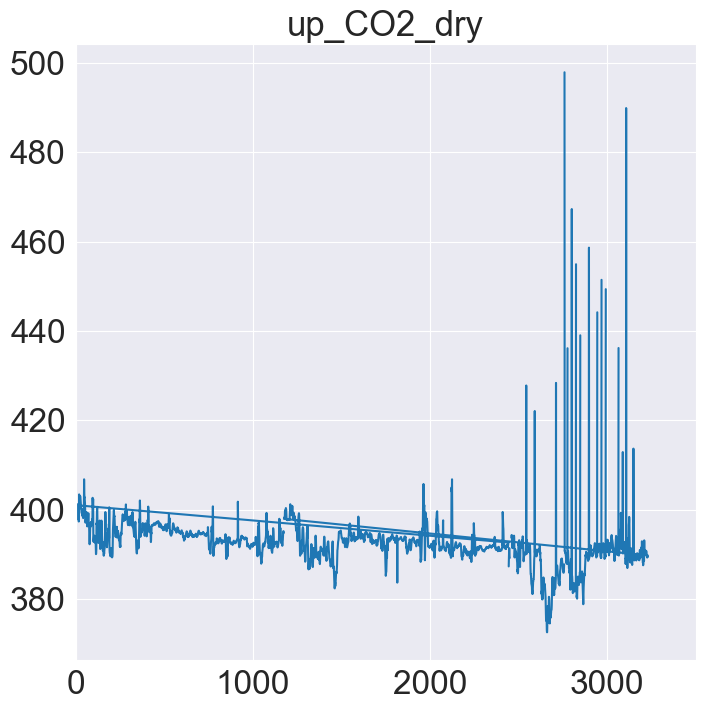

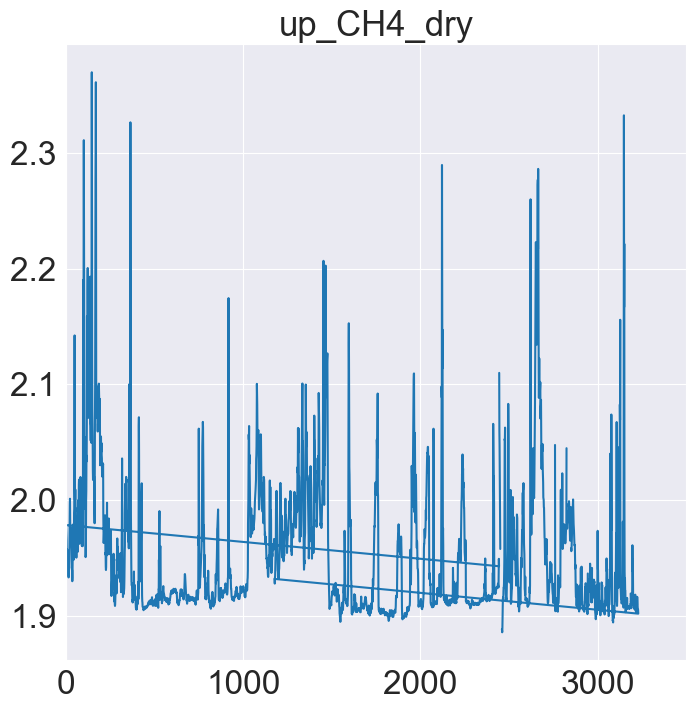

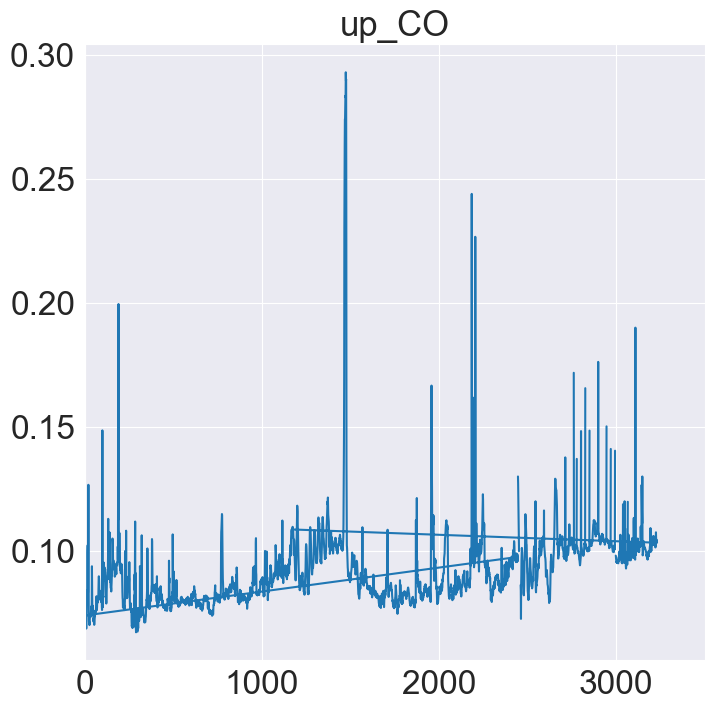

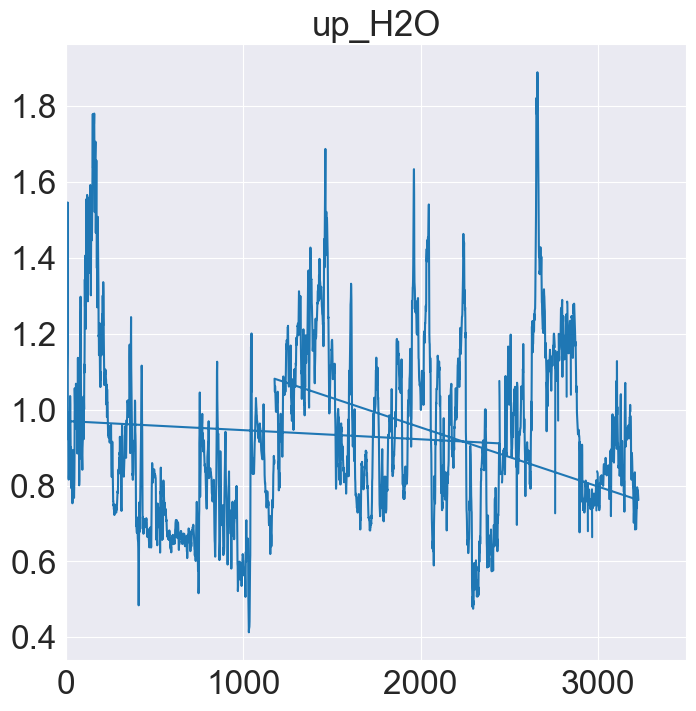

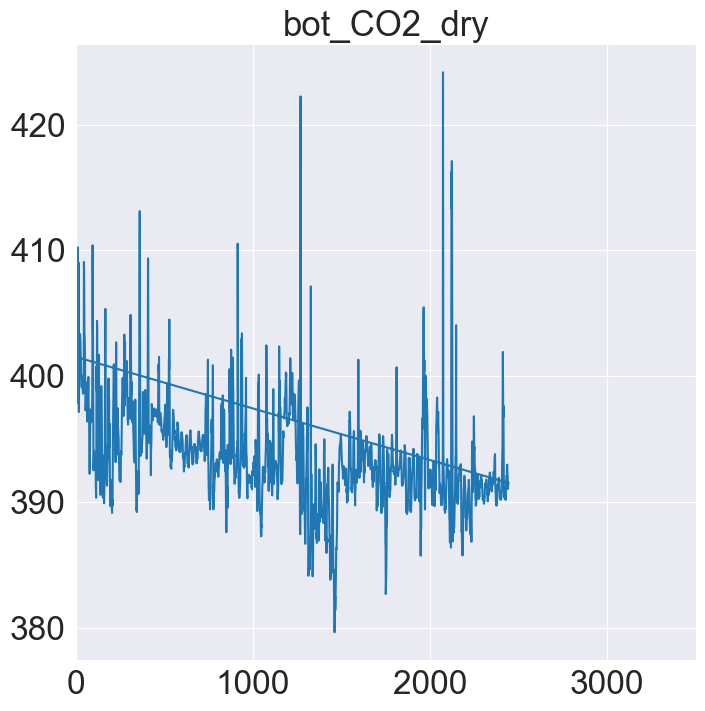

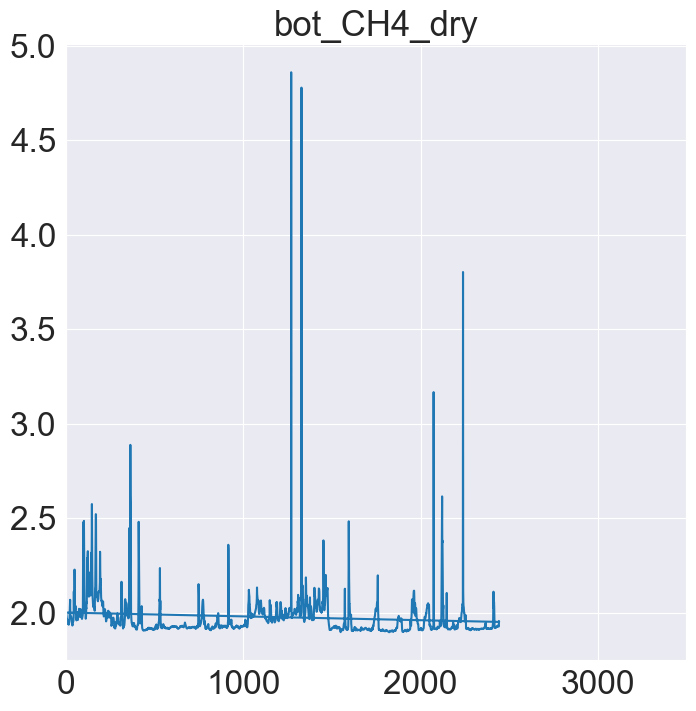

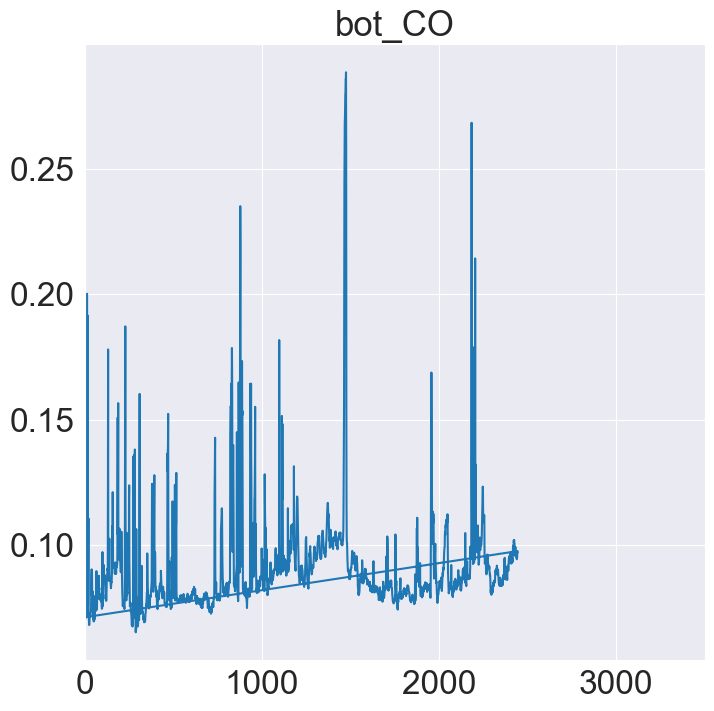

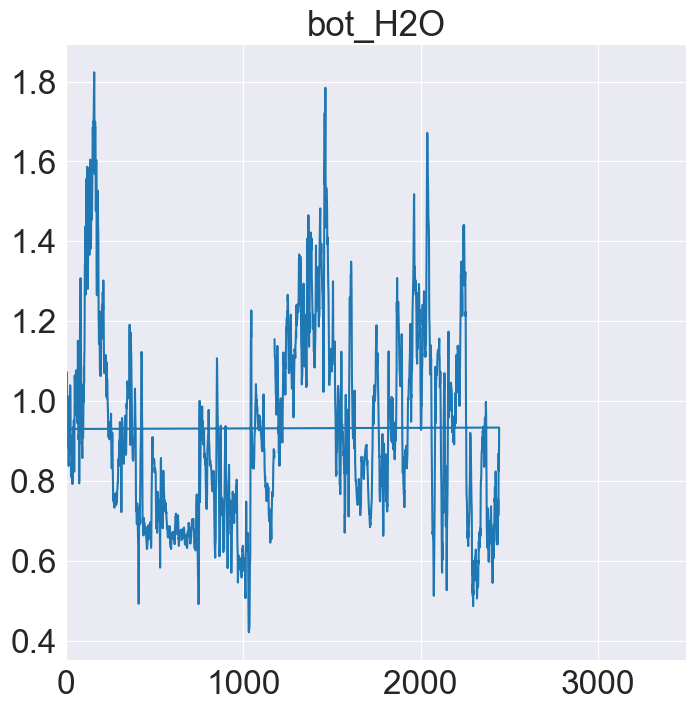

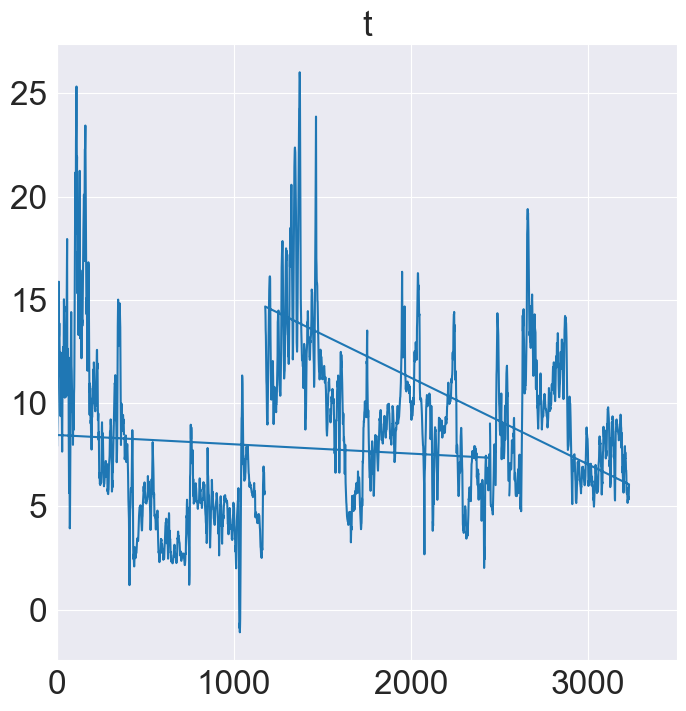

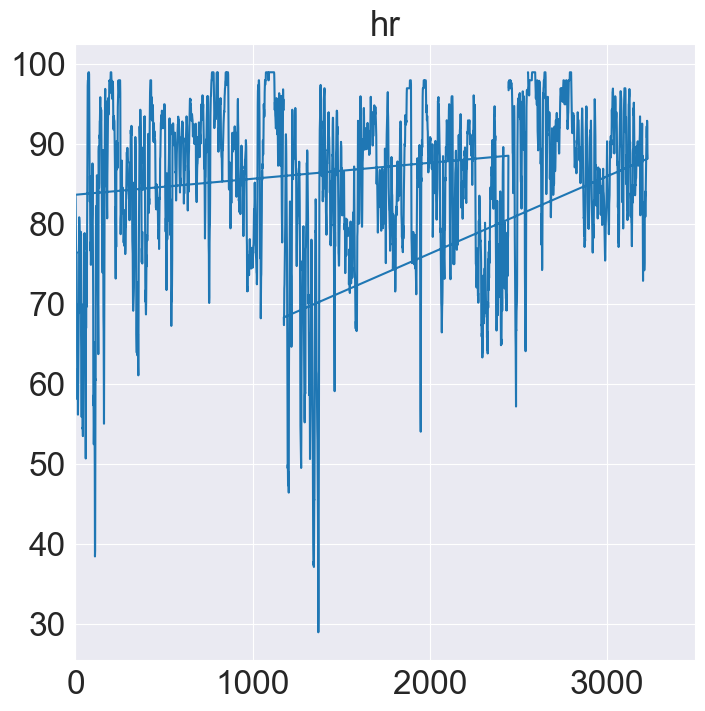

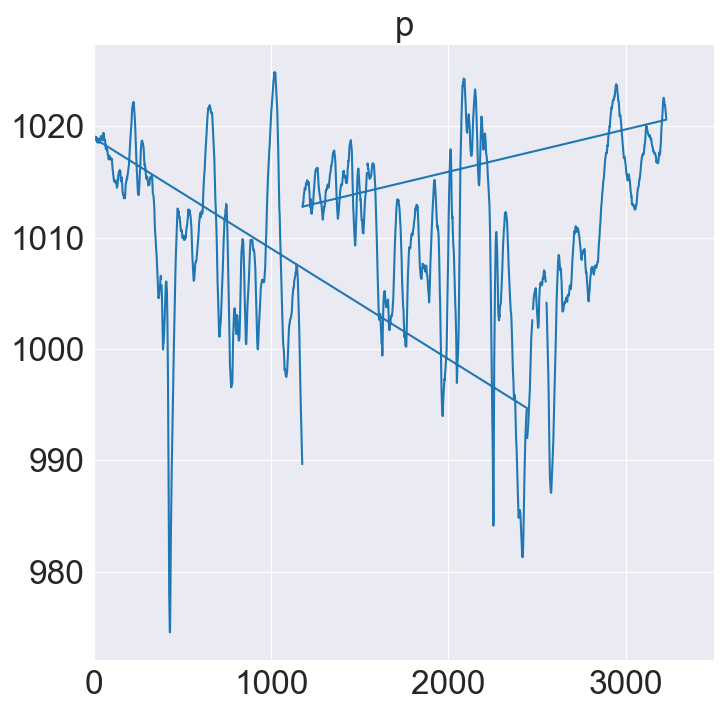

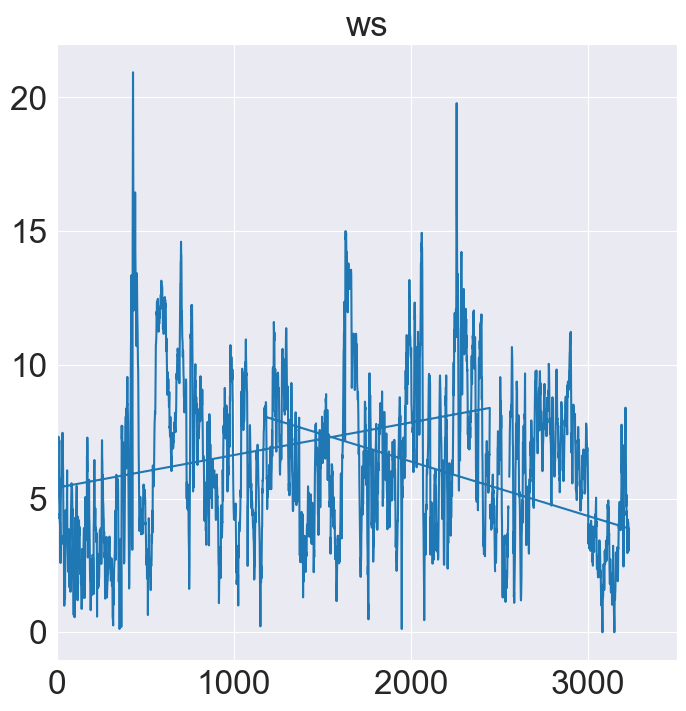

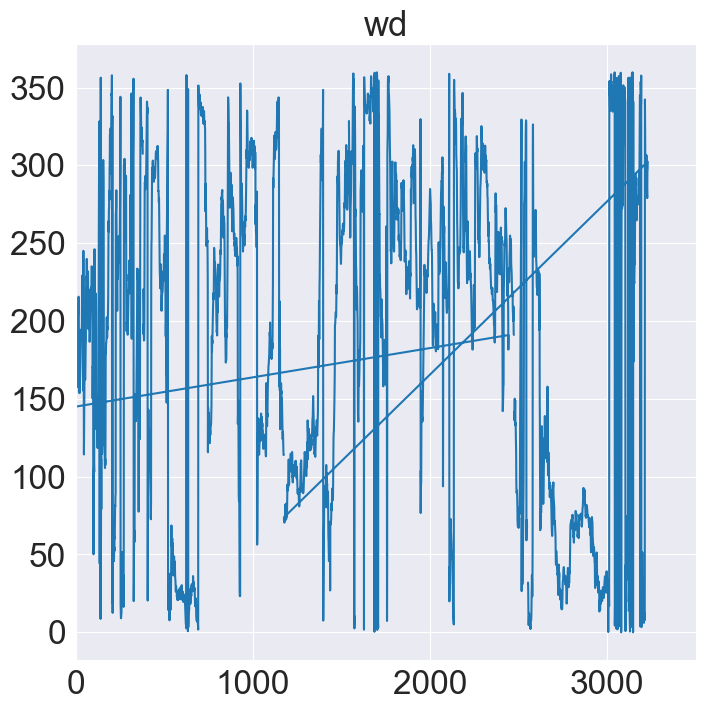

In [95]:
for i in df.columns.tolist()[7:20]:
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(df[i])
    ax.set_title(i)
    ax.set_xlim([0, 3500])


## Normalizing of data

In [96]:

cols_to_keep = df.columns[7:11].tolist() + df.columns[15:20].tolist()

df_filtered = df.loc[:, cols_to_keep]

df_filtered.head()

up_CO2_dry  up_CH4_dry   up_CO  up_H2O         t         hr           p  \
2445      387.30      2.1098  0.1299  1.0759  9.017167  96.750000  991.999167   
2446      389.49      2.0592  0.1270  1.0363  8.391833  97.850000  992.208500   
2447      390.52      2.0471  0.1209  0.9341  7.112000  97.000000  992.440500   
2448      391.38      2.0273  0.1143  0.8776  5.797500  97.983333  992.631667   
2449      390.06      2.0107  0.1084  0.8560  5.289333  98.000000  992.842833   

            ws          wd  
2445  4.748736  226.360505  
2446  4.320728  233.907177  
2447  4.774071  224.789149  
2448  4.231063  226.034965  
2449  4.248462  237.972966

In [97]:
df_filtered.describe()

up_CO2_dry   up_CH4_dry        up_CO       up_H2O            t  \
count  3210.000000  3210.000000  3210.000000  3210.000000  3222.000000   
mean    392.628731     1.952278     0.091762     0.933397     8.490386   
std       5.742818     0.060282     0.016818     0.233758     3.887101   
min     372.560000     1.885600     0.067095     0.413273    -1.093000   
25%     390.735845     1.912182     0.081992     0.757386     5.625500   
50%     392.513816     1.924880     0.088616     0.894050     8.047583   
75%     394.569368     1.975191     0.099339     1.085175    10.684833   
max     497.890000     2.369614     0.292851     1.889800    26.014667   

                hr            p           ws           wd  
count  3222.000000  3222.000000  3222.000000  3222.000000  
mean     85.371079  1010.134324     6.301638   185.937916  
std      10.110430     8.212677     3.030539   105.465598  
min      28.966667   974.567833     0.000000     0.000000  
25%      79.683333  1005.211125     3.957623    89.003352  
50%      87.316667  1011.465750     6.040770   209.266844  
75%      92.850000  1016.078875     8.210279   275.777452  
max      99.000000  1024.842500    20.942549   359.853457

In [98]:
desc = df_filtered.describe()

# Расчет дополнительных статистик
additional_stats = pd.DataFrame({
    'median': df_filtered.median(),
    'mode': df_filtered.mode().iloc[0],  # Берем первую моду для каждой колонки
    'variance': df_filtered.var(),
    'skewness': df_filtered.skew(),
    'kurtosis': df_filtered.kurt()
}).T

# Объединение таблиц
extended_desc = pd.concat([desc, additional_stats])

# Сохранение в файл
extended_desc.to_excel('/Users/user/PycharmProjects/SensorForecasts/data/extended_description.xlsx')


In [99]:
df_filtered.to_csv(get_project_root() / 'data/Belyy2017_GHG.csv')

In [100]:
df_filtered = df_filtered.dropna()

In [101]:
df_zscored = z_score(df_filtered)

In [102]:
df_zscored.head()

up_CO2_dry  up_CH4_dry     up_CO    up_H2O         t        hr  \
2445   -0.926537    2.611676  2.264473  0.607867  0.133708  1.127658   
2446   -0.545680    1.772648  2.092237  0.438665 -0.026888  1.236364   
2447   -0.366555    1.572011  1.729946  0.001988 -0.355570  1.152364   
2448   -0.216995    1.243695  1.337960 -0.239424 -0.693156  1.249541   
2449   -0.446553    0.968441  0.987548 -0.331715 -0.823661  1.251188   

             p        ws        wd  
2445 -2.216891 -0.511739  0.381495  
2446 -2.191330 -0.652692  0.453146  
2447 -2.163001 -0.503396  0.366576  
2448 -2.139658 -0.682220  0.378404  
2449 -2.113873 -0.676490  0.491748

In [103]:
df_zscored.to_csv(get_project_root() / 'data/Belyy2017_GHG_zscore.csv')

In [104]:
nan_counts = df_filtered.isnull().sum()

In [105]:
nan_counts.head

<bound method NDFrame.head of up_CO2_dry    0
up_CH4_dry    0
up_CO         0
up_H2O        0
t             0
hr            0
p             0
ws            0
wd            0
dtype: int64>

## Plot train/test split

In [83]:
keys = df_filtered.columns.tolist()
values = ['CO2 на высоте влажный', 'CH4 на высоте влажный', 'CO на высоте', 'H2O на высоте',  'Температура', 'Влажность', 'Давление', 'Скорость ветра', 'Направление ветра']
mesures = ['z_score PPM', 'z_score PPM', 'z_score PPM', 'z_score PPM', 'z_score Градусы цельсия', 'z_score Проценты', 'z_score 1e2 паскаль', 'z_score Метр/секунду', 'z_score Градусы']

In [84]:
ru_names_convert = {key: value for key, value in zip(keys, values)}

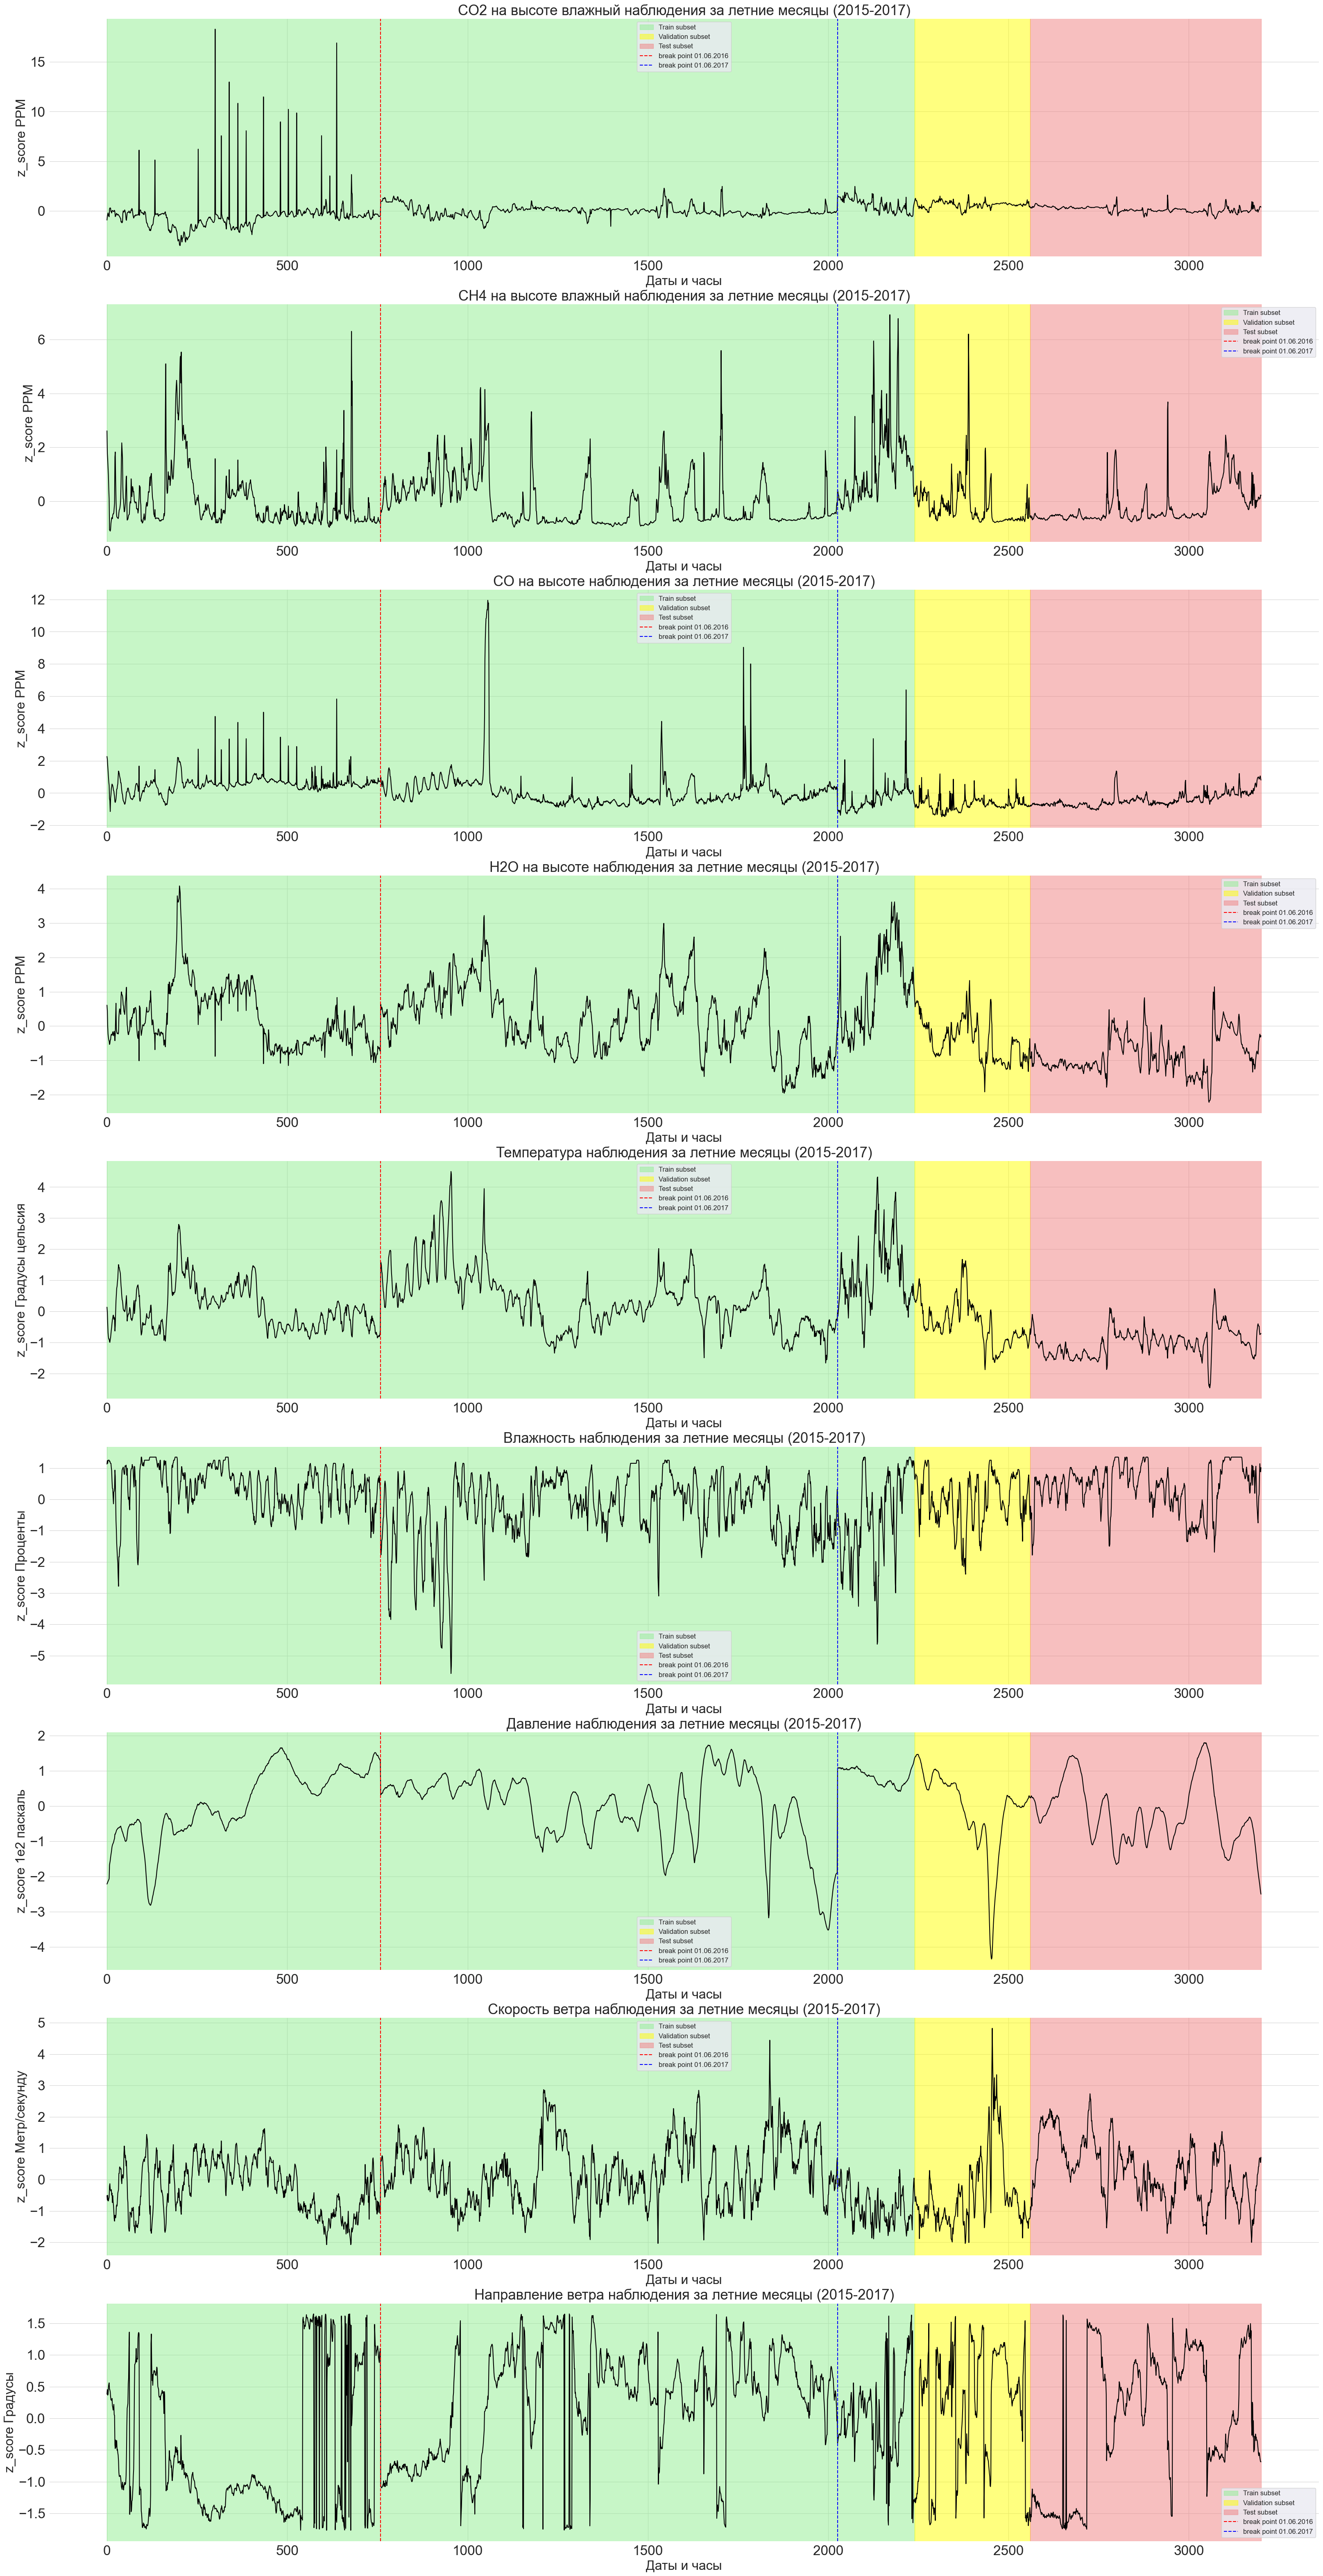

In [85]:
import matplotlib.pyplot as plt
df_filtered_with_date = copy(df_filtered)
df_filtered_with_date['date'] = df['fulldate (GMT)']
df_filtered_with_date = df_filtered_with_date.sort_values(by='date')

# Создаем фиктивную ось X, чтобы отображать данные последовательно без промежутков
df_filtered_with_date['fake_x'] = range(len(df_filtered_with_date))

# Настраиваем метки для оси X
labels = df_filtered_with_date['date'].dt.strftime('%b %d %Y')
fig, axs = plt.subplots(9,  figsize=(40, 80), facecolor='white')
plt.rcParams.update({
    'font.size': 23,                # Размер шрифта для текста по умолчанию
    'axes.labelsize': 12,           # Размер шрифта для меток осей
    'axes.titlesize': 25,           # Размер шрифта для заголовков осей
    'xtick.labelsize': 24,          # Размер шрифта для меток по оси X
    'ytick.labelsize': 24,          # Размер шрифта для меток по оси Y
    'legend.fontsize': 12,          # Размер шрифта для легенды
})

# Проход по каждой оси и создание графиков
for i, name in enumerate(ru_names_convert.keys()):
    
    # Построение графика на основе фиктивной оси X
    axs[i].set_facecolor('white')
    axs[i].plot(df_filtered_with_date['fake_x'], df_filtered_with_date[name], linestyle='-', color='black', markersize=2)
    axs[i].axvspan(0, int(len(df_filtered_with_date) * 0.7), color='lightgreen', alpha=0.5, label='Train subset') 
    axs[i].axvspan(int(len(df_filtered_with_date) * 0.7), int(len(df_filtered_with_date) * 0.8), color='yellow', alpha=0.5, label='Validation subset')  
    axs[i].axvspan(int(len(df_filtered_with_date) * 0.8), len(df_filtered_with_date), color='lightcoral', alpha=0.5, label='Test subset')
    
    # Настройка меток на оси X (с интервалом для удобства)
    step = len(df) // 20  # Устанавливаем шаг для меток, чтобы они не накладывались друг на друга
    axs[i].axvline(x=759, color='red', linestyle='--', label='break point 01.06.2016')
    axs[i].axvline(x=2026, color='blue', linestyle='--', label='break point 01.06.2017')
    axs[i].legend()
    axs[i].set_xlabel('Даты и часы')
    axs[i].set_ylabel(mesures[i])
    axs[i].set_title(f'{ru_names_convert[name]} наблюдения за летние месяцы (2015-2017)')
    axs[i].grid(color='lightgrey')
    # ax_twiny.set_xticks(df_filtered_with_date['fake_x'][::step], labels[::step], rotation=45, ha='right')
plt.show()